<a href="https://colab.research.google.com/github/Katas-23/TCS_EV_Project/blob/main/Dataset_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made by David Gyulgyulyan
ID: 6_Gyulgyulyan

Crafting a research question:
* Identify a problem

---

Keep in mind these two to balance them:

Is it specific enough to answer thoroughly?

Is it complex enough to require research methods?

---

Bad Questions:
What makes a good superbowl ad?
What percentage of ads contain humor?
Can be answered with one statistic/analysis

Correct Questions:
What variables play an important role in determining if an ad will be well-liked, and how have these changed over time?

---

Compare:
Is there a meaningful differnece between 2 or more categorial groups?
Are there variations or patterns acorss different time periods or regions?

Classify:
How well can you predict which group an observation belongs to by using variables in the dataset?
What are the key predictors or factors that influence... [INCOMPLETE]

---

Ask yourself:
Which variable do you want to try to predict?
What categories do you most want to distinguish between?
Which independent variables are you most interested in investigating their effect?
  Which seem most intersting to you?
What are some ways you can group the data or some variables together?
What change or difference are you most interested in?
What result/finding would be most useful to someone interested in this topic?

---

Exploratory Data Analysis:
1. Ask a question about your data.
2. Search for ansers by visualizing and transforming your data.
3. Ask a follow-up question.

The key to asking good follow-up questions will be to rely on your curiosity (What do you want to learn more about?) as well as your skepticism (How could this be misleading?)

**Goal: Develop an *understanding* of your data.**

---

Exploratory Questions:
Which values are the most common? Why?
Which values are rare? Why? Does that match your expectations?
Can you see ay unusual patterns? What might explain them?

If you spot a pattern, ask yourself:
Could this pattern be due to a coincidence (i.e. random chance)?
How can you describe the relationship implied by the pattern?
How strong is the relationship implied by the pattern?
What other varaibles might affect the relationship?
Does the relationship change if you kook at individual subgroups of the data?

---

Messy Data:
Real world datasets are rarely ready to use in their raw form. There can be a variety of problems with a dataset, including:
* Missing values
* Duplicates
* Unstructured data
* Inaccurate or nonsensical data
* Lack of standardization (*New York City* coded as "NY", "NYC", or "NeYoCi")

Types of Messy Data:
Missing data:
* Often the entry will be blank, NaN, or coded as a nonsensical value (like -1111 or 9996)

To look for messy data, use **.info()**
Also use conditionals:
"df[(df['Age']<0) | (df['Age']>100)]"

Another way is **.isna()**

Dropping Missing Values
df.dropna(axis=0 or 1, how = 'any', subset = None)

0 is rows, 1 is columns
any = if there are ANY null values
all = if ALL rows/columns contain null

subset = limits the function to specific rows/columns

df['column name'] = df['column name'].fillna(value = varname)

---

Goals for 7/22:
* Finish setting up your project & connecting to GitHub
* Understand the context of your project & dataset
* Come up with 2-3 potential research questions for yur project and start exploring your data
* Meet with mentor(s) to share your research question ideas and ask any questions about the dataset

Sample Questions:

“How does the type of electric vehicle (BEV vs. PHEV) adopted vary across rural and urban counties in Washington State?”

“Can MSRP and electric range be used to accurately predict whether a vehicle is eligible for CAFV incentives?”

“What regional trends in EV adoption emerge across Washington, and how do these relate to electric utility service areas?”

“What characteristics are most associated with long-range electric vehicles, and do those differ based on vehicle make or year?”

“How has the popularity of BEVs changed over time compared to PHEVs, and which manufacturers dominate each type?”

# **Import important stuff**

In [ ]:
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# **Data Cleaning**

# 1. Import Dataset

In [ ]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD" # This is the direct link to the CSV data

ev_df = pd.read_csv(url)
display(ev_df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


# 2. Check for Null Values

In [ ]:
# Checking for null values.
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [ ]:
# Checking for null values.
ev_df[ev_df.isna().any(axis = 1)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
265,7JRBR0FM0N,NaN,NaN,BC,NaN,2022,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,NaN,205035967,NaN,NaN,NaN
296,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN,NaN
321,5YJ3E1EB2M,NaN,NaN,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,NaN,NaN,NaN
18669,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
26239,WP0AH2YA6S,Kitsap,Poulsbo,WA,98370.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,23.0,277679979,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250312,5YJ3E1EA1R,Olmsted,Rochester,MN,55903.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,272474205,POINT (-92.47868 44.03008),NON WASHINGTON STATE ELECTRIC UTILITY,2.710900e+10
250331,WVWPR7AUXK,Ventura,Moorpark,CA,93021.0,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125.0,0.0,NaN,259831708,POINT (-118.88221 34.28706),NON WASHINGTON STATE ELECTRIC UTILITY,6.111008e+09
250354,5YJ3E1EB1K,Barnstable,Brewster,MA,2631.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,117046933,POINT (-70.06624 41.75916),NON WASHINGTON STATE ELECTRIC UTILITY,2.500101e+10
250470,1G1FX6S06J,Montgomery,Conroe,TX,77304.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,NaN,110401007,POINT (-95.4946 30.33878),NON WASHINGTON STATE ELECTRIC UTILITY,4.833969e+10


# 3. Learning About the Dataset

In [ ]:
# This is not important, but useful.
print(ev_df['Make'].unique())
print(ev_df['Model'].unique())

['TESLA' 'KIA' 'FIAT' 'TOYOTA' 'CHEVROLET' 'AUDI' 'NISSAN' 'ACURA' 'BMW'
 'FORD' 'RIVIAN' 'MAZDA' 'CHRYSLER' 'VOLVO' 'PORSCHE' 'POLESTAR' 'JEEP'
 'MINI' 'MITSUBISHI' 'HYUNDAI' 'VOLKSWAGEN' 'FISKER' 'LEXUS' 'SMART'
 'HONDA' 'SUBARU' 'MERCEDES-BENZ' 'LAND ROVER' 'LUCID' 'CADILLAC'
 'GENESIS' 'GMC' 'LINCOLN' 'JAGUAR' 'ALFA ROMEO' 'VINFAST' 'DODGE' 'TH!NK'
 'LAMBORGHINI' 'BENTLEY' 'BRIGHTDROP' 'MULLEN AUTOMOTIVE INC.'
 'ROLLS-ROYCE' 'WHEEGO ELECTRIC CARS' 'AZURE DYNAMICS' 'RAM']
['MODEL S' 'EV6' 'MODEL Y' '500' 'NIRO' 'MODEL X' 'MODEL 3' 'PRIUS'
 'BOLT EV' 'VOLT' 'E-TRON' 'LEAF' 'ZDX' '330E' 'I3' 'C-MAX' 'R1T' 'CX-90'
 'PACIFICA' 'S60' 'PANAMERA' 'FUSION' 'SPORTAGE' 'XC60' 'XC90' 'SORENTO'
 'PS2' 'X5' 'GRAND CHEROKEE' 'Q5 E' 'F-150' 'XC40' 'COUNTRYMAN'
 'OUTLANDER' 'C40' 'BZ4X' 'WRANGLER' 'X3' 'HARDTOP' 'TUCSON' 'I5' 'E-GOLF'
 '745E' 'SOUL' 'FOCUS' 'ARIYA' 'A3' 'RAV4 PRIME (PHEV)' 'Q4'
 'MUSTANG MACH-E' 'SANTA FE' 'OCEAN' 'ESCAPE' 'R1S' 'PRIUS PRIME (PHEV)'
 'I8' 'OPTIMA' 'RX' 'FORTWO' 'IO

In [ ]:
# Analyzing different "Electric Vehicle Type"
print(ev_df['Electric Vehicle Type'].unique())

['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


In [ ]:
# Check first and last rows to get a general idea.
ev_df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
250658,JTMAB3FV8P,Klickitat,Goldendale,WA,98620.0,2023,TOYOTA,RAV4 PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,14.0,255440223,POINT (-120.82545 45.823),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...,5.303995e+10


# 4. Cleaning Up the Dataset

In [ ]:
ev_df['City'].isna().sum()

np.int64(6)

In [ ]:
# Remove all non-Washington states (along with null values) by creating a new DataFrame.
wa_df = ev_df[ev_df['State'] == 'WA']

# 5. Cleaning Up Remaining Null Values

In [ ]:
wa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250076 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250076 non-null  object 
 1   County                                             250076 non-null  object 
 2   City                                               250076 non-null  object 
 3   State                                              250076 non-null  object 
 4   Postal Code                                        250076 non-null  float64
 5   Model Year                                         250076 non-null  int64  
 6   Make                                               250076 non-null  object 
 7   Model                                              250076 non-null  object 
 8   Electric Vehicle Type                              250076 non-null  object 
 9 

In [ ]:
print(wa_df[['Electric Range', 'Base MSRP', 'Vehicle Location']].isna().sum())

Electric Range      21
Base MSRP           21
Vehicle Location     8
dtype: int64


In [ ]:
wa_df[wa_df.isna().any(axis = 1)]
# After looking at the missing values, only luxury vehicles are missing values, so it is not random.
# Coordinates may be useless in this study, so they can be removed.

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
18669,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
26239,WP0AH2YA6S,Kitsap,Poulsbo,WA,98370.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,23.0,277679979,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
47277,WP0AE2YA6S,King,Seattle,WA,98121.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,36.0,277367618,POINT (-122.34468 47.61578),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
54153,WP0AC2YA3S,King,Shoreline,WA,98177.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,32.0,274513284,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
56385,WP0AC2YA2S,King,Medina,WA,98039.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,48.0,274380816,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
64323,ZHWUC1ZM3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,41.0,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
83958,WP0AE2YA5S,Snohomish,Everett,WA,98203.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,38.0,275868400,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
93248,WP0AF2YA0S,Clark,Vancouver,WA,98683.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,17.0,276229299,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
99682,WP0AE2YA3S,King,Clyde Hill,WA,98004.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,48.0,281279393,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
109185,WP0AE2YA5S,Snohomish,Lake Stevens,WA,98258.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,44.0,281288500,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
# NOTE: This code was obtained online.
ev_df_clean = wa_df.dropna(subset=['Electric Range', 'Base MSRP']) # Drop null values in these 2 columns.
ev_df_clean = ev_df_clean.drop(columns=['Vehicle Location']) # This column is useless, so remove it.
ev_df_clean.reset_index(drop=True, inplace=True) # Reset index.

In [ ]:
# Now, we need to check whether everything is correct now.
ev_df_clean.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,PUGET SOUND ENERGY INC,5.303508e+10


In [ ]:
ev_df_clean.info()
# All null values and useless columns have been removed!
# Data cleaning is complete; graphing can begin now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250055 entries, 0 to 250054
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250055 non-null  object 
 1   County                                             250055 non-null  object 
 2   City                                               250055 non-null  object 
 3   State                                              250055 non-null  object 
 4   Postal Code                                        250055 non-null  float64
 5   Model Year                                         250055 non-null  int64  
 6   Make                                               250055 non-null  object 
 7   Model                                              250055 non-null  object 
 8   Electric Vehicle Type                              250055 non-null  object

In [ ]:
ev_df_clean['Base MSRP'].unique()

array([     0.,  69900.,  36900.,  31950.,  52900.,  39995.,  98950.,
        54950.,  45600.,  53400.,  44100.,  32250.,  64950.,  59900.,
        33950.,  34995.,  81100.,  36800., 110950.,  55700., 184400.,
        52650., 109000.,  43700.,  90700., 102000.,  32995.,  89100.,
        75095., 845000.,  91250.])

# **Graphing (EDA)**

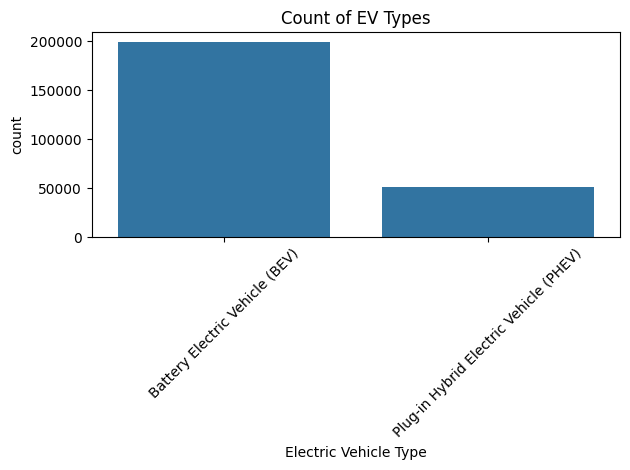

In [ ]:
# Now, it's time to explore the data and see what's up with it.
# NOTE: This code was obtained online.
sns.countplot(data=ev_df_clean, x='Electric Vehicle Type')
plt.title('Count of EV Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# There is a staggering difference between BEVs and PHEVs.

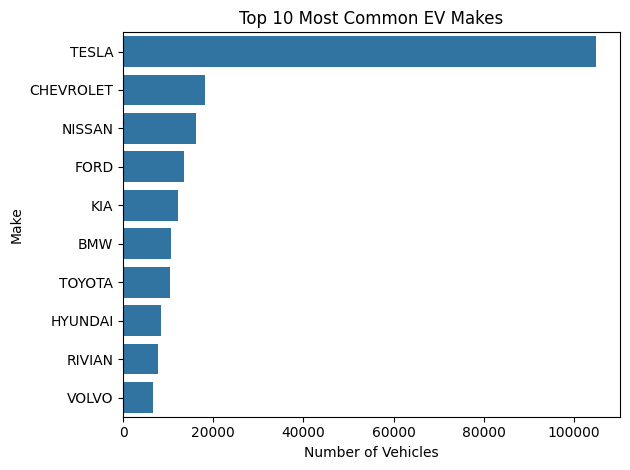

In [ ]:
# Now, let's see which brand is the most popular.
# NOTE: This code was obtained online.
top_makes = ev_df_clean['Make'].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Most Common EV Makes')
plt.xlabel('Number of Vehicles')
plt.tight_layout()
plt.show()
# Tesla has the most EV makes. Who could've predicted that?

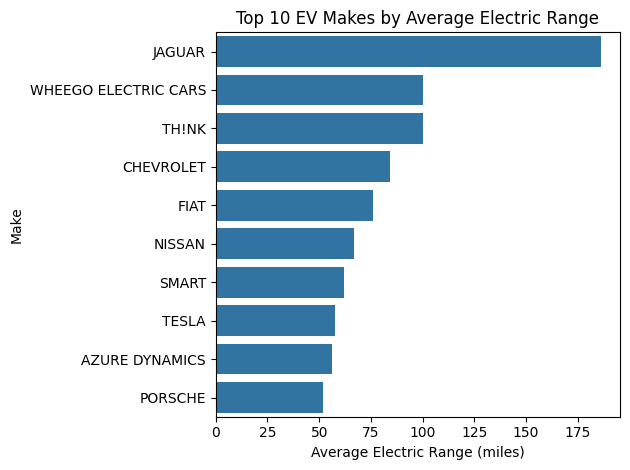

In [ ]:
# Now, let's see the top average electric range of brands.
# NOTE: This code was obtained online.
avg_range = ev_df_clean.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_range.values, y=avg_range.index)
plt.title('Top 10 EV Makes by Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.tight_layout()
plt.show()
# Jaguar has the most average electric range.

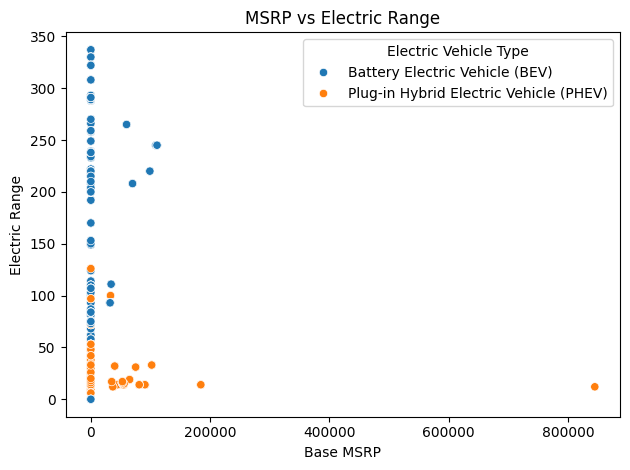

In [ ]:
# NOTE: This code was obtained online.
sns.scatterplot(data=ev_df_clean, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type')
plt.title('MSRP vs Electric Range')
plt.tight_layout()
plt.show()

# Hybrid cars have a much lower electric range.
# There is also a significant outlier regarding Base MSRP?

# **KNN**

In [ ]:
# NOTE: This code was obtained online.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant numeric features (you can add more if needed)
features = ['Base MSRP', 'Model Year']
target = 'Electric Range'

# Drop rows with missing values in selected columns
knn_df = ev_df_clean[features + [target]].dropna()

X = knn_df[features]
y = knn_df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1927.073757373378
R^2 Score: 0.7183289512232436


In [ ]:
from sklearn import datasets, model_selection, metrics

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ["BEV","PHEV"])

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets